In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


In [2]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
    ].copy()

len(df_DA_US)

67816

In [3]:
df_USA_salary_filtered = df_DA_US['salary_year_avg'].dropna()

In [4]:
len(df_USA_salary_filtered)

4350

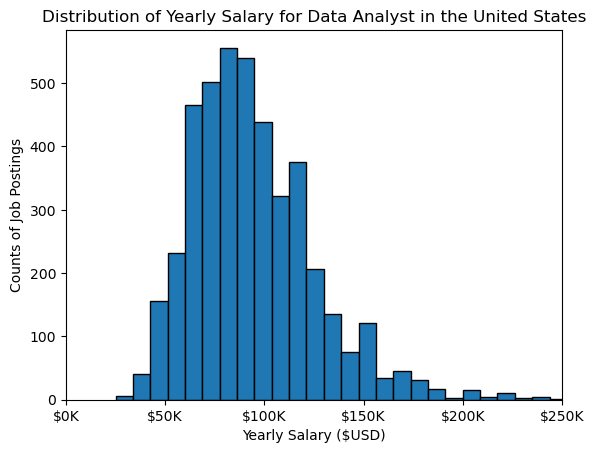

In [5]:
df_USA_salary_filtered.plot(kind='hist', bins=40, edgecolor='black')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,250000)

plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Counts of Job Postings')
plt.title('Distribution of Yearly Salary for Data Analyst in the United States')

plt.show()